In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout,GRU
from tensorflow.keras.optimizers import Adam

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(tf.__version__)

2.17.1


In [ ]:
# GPU configuration
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    tf.config.set_visible_devices(physical_devices[0], 'GPU')
    print("GPU is available and configured")
else:
    print("No GPU devices found, using CPU")

GPU is available and configured


In [ ]:
print(tf.config.get_visible_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
print("GPU?: ", tf.config.list_physical_devices('GPU'))

GPU?:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
path='LAST_DATA.csv'

In [ ]:
df=pd.read_csv(path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104361 entries, 0 to 104360
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   DATETIME      104361 non-null  object 
 1   RUZGARYON     104361 non-null  float64
 2   RUZGARHIZ     104361 non-null  float64
 3   SICKURU       104361 non-null  float64
 4   NISPINEM      104361 non-null  float64
 5   BASINCAKTUEL  104361 non-null  float64
 6   HADISE0       104361 non-null  object 
 7   HADISE1       104361 non-null  object 
 8   GHADISE0      104361 non-null  object 
 9   BLT0CINS      104361 non-null  float64
 10  BLT0YUK       104361 non-null  float64
 11  AY            104361 non-null  int64  
 12  SAAT          104361 non-null  int64  
 13  MEVSIM        104361 non-null  int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 11.1+ MB


In [ ]:
df['DATETIME']=pd.to_datetime(df['DATETIME'])
df.set_index('DATETIME',inplace=True)


In [ ]:
df.head()

,RUZGARYON,RUZGARHIZ,SICKURU,NISPINEM,BASINCAKTUEL,HADISE0,HADISE1,GHADISE0,BLT0CINS,BLT0YUK,AY,SAAT,MEVSIM
DATETIME,,,,,,,,,,,,,
2016-01-01 00:20:00,240.0,7.0,-0.6,95.0,1016.3,-SHSN,,,7.0,900.0,1,0,4
2016-01-01 00:50:00,240.0,7.0,-0.8,97.0,1016.4,-SHSN,,,7.0,900.0,1,0,4
2016-01-01 01:20:00,240.0,7.0,-0.9,97.0,1016.3,-SHSN,,,7.0,1000.0,1,1,4
2016-01-01 01:50:00,230.0,8.0,-0.9,97.0,1016.4,-SHSN,,,7.0,900.0,1,1,4
2016-01-01 02:20:00,230.0,9.0,-0.7,94.0,1016.3,-SHSN,,,8.0,2800.0,1,2,4


In [ ]:
    # Get numeric and categorical columns
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df.select_dtypes(include=['object', 'category']).columns
target_features = ['SICKURU']

In [ ]:
encoder=OneHotEncoder(sparse_output=False, drop='first')

In [ ]:
categorical_data=df[categorical_features]
encoded_data = pd.DataFrame(encoder.fit_transform(df[categorical_features]),
                                      columns=encoder.get_feature_names_out(categorical_features),
                                      index=df.index)

In [ ]:
new_df= pd.concat([df,encoded_data],axis=1)

In [ ]:
new_df = new_df.drop(columns=categorical_features)

In [ ]:
new_df=new_df.astype('float32')

In [ ]:
new_df=new_df.resample('h').mean().ffill()

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53911 entries, 2016-01-01 00:00:00 to 2022-02-24 06:00:00
Freq: h
Data columns (total 62 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RUZGARYON          53911 non-null  float32
 1   RUZGARHIZ          53911 non-null  float32
 2   SICKURU            53911 non-null  float32
 3   NISPINEM           53911 non-null  float32
 4   BASINCAKTUEL       53911 non-null  float32
 5   BLT0CINS           53911 non-null  float32
 6   BLT0YUK            53911 non-null  float32
 7   AY                 53911 non-null  float32
 8   SAAT               53911 non-null  float32
 9   MEVSIM             53911 non-null  float32
 10  HADISE0_+DZ        53911 non-null  float32
 11  HADISE0_+RA        53911 non-null  float32
 12  HADISE0_+SHRA      53911 non-null  float32
 13  HADISE0_+SHSN      53911 non-null  float32
 14  HADISE0_+TSRA      53911 non-null  float32
 15  HADISE0_-DZ        53911 no

In [ ]:
new_df.tail()

,RUZGARYON,RUZGARHIZ,SICKURU,NISPINEM,BASINCAKTUEL,BLT0CINS,BLT0YUK,AY,SAAT,MEVSIM,...,GHADISE0_RESHRA,GHADISE0_RESHRASN,GHADISE0_RESHSN,GHADISE0_RESHSNGR,GHADISE0_RESHSNRA,GHADISE0_RETS,GHADISE0_RETSGRRA,GHADISE0_RETSRA,GHADISE0_RETSSNGR,GHADISE0_RETSSNRA
DATETIME,,,,,,,,,,,,,,,,,,,,,
2022-02-24 02:00:00,139.5,5.0,15.049999,42.0,1010.900024,8.0,3500.0,2.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-24 03:00:00,99.0,3.5,15.900001,38.5,1010.599976,8.0,3500.0,2.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-24 04:00:00,185.0,3.5,16.100000,36.5,1010.599976,8.0,3500.0,2.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-24 05:00:00,99.0,1.5,15.200000,49.5,1011.049988,8.0,3500.0,2.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-24 06:00:00,300.0,11.0,12.000000,77.0,1011.599976,8.0,3500.0,2.0,6.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df['SICKURU'].describe()

,SICKURU
count,104361.000000
mean,16.172910
std,6.920651
min,-3.200000
25%,10.300000
50%,15.900000
75%,22.600000
max,37.500000


In [ ]:
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(new_df), columns=new_df.columns, index=new_df.index)


In [ ]:
scaled_df.head()

,RUZGARYON,RUZGARHIZ,SICKURU,NISPINEM,BASINCAKTUEL,BLT0CINS,BLT0YUK,AY,SAAT,MEVSIM,...,GHADISE0_RESHRA,GHADISE0_RESHRASN,GHADISE0_RESHSN,GHADISE0_RESHSNGR,GHADISE0_RESHSNRA,GHADISE0_RETS,GHADISE0_RETSGRRA,GHADISE0_RETSRA,GHADISE0_RETSSNGR,GHADISE0_RETSSNRA
DATETIME,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,0.666667,0.333333,0.056194,0.956044,0.618484,0.250,0.195122,0.0,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-01 01:00:00,0.652778,0.357143,0.051086,0.967033,0.618484,0.250,0.207317,0.0,0.043478,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-01 02:00:00,0.638889,0.380952,0.054917,0.934066,0.618484,0.375,0.500000,0.0,0.086957,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-01 03:00:00,0.708333,0.285714,0.060026,0.901099,0.632702,0.375,0.390244,0.0,0.130435,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-01 04:00:00,0.611111,0.333333,0.044700,0.978022,0.632704,0.250,0.182927,0.0,0.173913,1.0,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
index_of_column = scaled_df.columns.get_loc('SICKURU')
print(index_of_column)

2


In [ ]:
train_dates=scaled_df.index

In [ ]:
train_dates.shape

(53911,)

In [ ]:
type(train_dates)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
print(train_dates)

DatetimeIndex(['2016-01-01 00:00:00', '2016-01-01 01:00:00',
               '2016-01-01 02:00:00', '2016-01-01 03:00:00',
               '2016-01-01 04:00:00', '2016-01-01 05:00:00',
               '2016-01-01 06:00:00', '2016-01-01 07:00:00',
               '2016-01-01 08:00:00', '2016-01-01 09:00:00',
               ...
               '2022-02-23 21:00:00', '2022-02-23 22:00:00',
               '2022-02-23 23:00:00', '2022-02-24 00:00:00',
               '2022-02-24 01:00:00', '2022-02-24 02:00:00',
               '2022-02-24 03:00:00', '2022-02-24 04:00:00',
               '2022-02-24 05:00:00', '2022-02-24 06:00:00'],
              dtype='datetime64[ns]', name='DATETIME', length=53911, freq='h')


In [ ]:
trainX=[]
trainY=[]
n_future = 168 # 7 days for 24 hours
n_past = 168 # 7 days for 24 hours

In [ ]:
for i in range (n_past, len(scaled_df) - n_future + 1):
    trainX.append(scaled_df.iloc[i - n_past:i, 0:scaled_df.shape[1]])
    trainY.append(scaled_df.iloc[i + n_future - 1:i + n_future, 2])

trainX, trainY = np.array(trainX), np.array(trainY)


In [ ]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (53576, 168, 62).
trainY shape == (53576, 1).


In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1], activation='linear'))


In [ ]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                       │ (None, 168, 128)            │          97,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 168, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 168, 128)            │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 168, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_16 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 278,849 (1.06 MB)

 Trainable params: 278,849 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True),
    ModelCheckpoint(filepath='/content/checkpoint.weights.h5', monitor='val_loss', verbose=1, save_weights_only=True, save_best_only=True),
    TensorBoard(log_dir='./logs/', histogram_freq=1, write_graph=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=1e-5, patience=3, verbose=1)
]

In [ ]:
history = model.fit(
    trainX, trainY,
    epochs=20,
    batch_size=64,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/20
754/754 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0157
Epoch 1: val_loss improved from inf to 0.00794, saving model to /content/checkpoint.weights.h5
754/754 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - loss: 0.0157 - val_loss: 0.0079 - learning_rate: 0.0010
Epoch 2/20
754/754 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0079
Epoch 2: val_loss improved from 0.00794 to 0.00773, saving model to /content/checkpoint.weights.h5
754/754 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - loss: 0.0079 - val_loss: 0.0077 - learning_rate: 0.0010
Epoch 3/20
752/754 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0071
Epoch 3: val_loss did not improve from 0.00773
754/754 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - loss: 0.0071 - val_loss: 0.0083 - learning_rate: 0.0010
Epoch 4/20
753/754 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0066
Epoch 4: val_loss did not improve from 0.00773
754/754 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - loss: 0.0066 - val_loss: 0.0083 - learning_rate: 0.0010
Epoch 5/20
753/754 ━━━━━━━━━━━━━━━━━

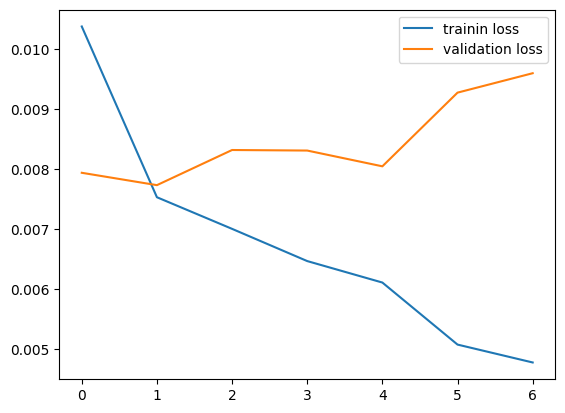

In [ ]:
plt.plot(history.history['loss'], label='trainin loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

In [ ]:
forecast_period_dates=pd.date_range(list(train_dates)[-1], periods=n_future, freq='h').tolist()


In [ ]:
print(forecast_period_dates)

[Timestamp('2022-02-24 06:00:00'), Timestamp('2022-02-24 07:00:00'), Timestamp('2022-02-24 08:00:00'), Timestamp('2022-02-24 09:00:00'), Timestamp('2022-02-24 10:00:00'), Timestamp('2022-02-24 11:00:00'), Timestamp('2022-02-24 12:00:00'), Timestamp('2022-02-24 13:00:00'), Timestamp('2022-02-24 14:00:00'), Timestamp('2022-02-24 15:00:00'), Timestamp('2022-02-24 16:00:00'), Timestamp('2022-02-24 17:00:00'), Timestamp('2022-02-24 18:00:00'), Timestamp('2022-02-24 19:00:00'), Timestamp('2022-02-24 20:00:00'), Timestamp('2022-02-24 21:00:00'), Timestamp('2022-02-24 22:00:00'), Timestamp('2022-02-24 23:00:00'), Timestamp('2022-02-25 00:00:00'), Timestamp('2022-02-25 01:00:00'), Timestamp('2022-02-25 02:00:00'), Timestamp('2022-02-25 03:00:00'), Timestamp('2022-02-25 04:00:00'), Timestamp('2022-02-25 05:00:00'), Timestamp('2022-02-25 06:00:00'), Timestamp('2022-02-25 07:00:00'), Timestamp('2022-02-25 08:00:00'), Timestamp('2022-02-25 09:00:00'), Timestamp('2022-02-25 10:00:00'), Timestamp('20

In [ ]:
type
(forecast_period_dates)

[Timestamp('2022-02-24 06:00:00'),
 Timestamp('2022-02-24 07:00:00'),
 Timestamp('2022-02-24 08:00:00'),
 Timestamp('2022-02-24 09:00:00'),
 Timestamp('2022-02-24 10:00:00'),
 Timestamp('2022-02-24 11:00:00'),
 Timestamp('2022-02-24 12:00:00'),
 Timestamp('2022-02-24 13:00:00'),
 Timestamp('2022-02-24 14:00:00'),
 Timestamp('2022-02-24 15:00:00'),
 Timestamp('2022-02-24 16:00:00'),
 Timestamp('2022-02-24 17:00:00'),
 Timestamp('2022-02-24 18:00:00'),
 Timestamp('2022-02-24 19:00:00'),
 Timestamp('2022-02-24 20:00:00'),
 Timestamp('2022-02-24 21:00:00'),
 Timestamp('2022-02-24 22:00:00'),
 Timestamp('2022-02-24 23:00:00'),
 Timestamp('2022-02-25 00:00:00'),
 Timestamp('2022-02-25 01:00:00'),
 Timestamp('2022-02-25 02:00:00'),
 Timestamp('2022-02-25 03:00:00'),
 Timestamp('2022-02-25 04:00:00'),
 Timestamp('2022-02-25 05:00:00'),
 Timestamp('2022-02-25 06:00:00'),
 Timestamp('2022-02-25 07:00:00'),
 Timestamp('2022-02-25 08:00:00'),
 Timestamp('2022-02-25 09:00:00'),
 Timestamp('2022-02-

In [ ]:
trainX[-n_future].shape

(168, 62)

In [ ]:
forecast=model.predict(trainX[-n_future:])

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [ ]:
print(forecast)
print(forecast.shape)

[[0.33083433]
 [0.33492428]
 [0.33749938]
 [0.3388266 ]
 [0.33818445]
 [0.33557135]
 [0.3313806 ]
 [0.3260197 ]
 [0.31996733]
 [0.3136798 ]
 [0.3074363 ]
 [0.3016752 ]
 [0.29672152]
 [0.2921353 ]
 [0.28823775]
 [0.28478342]
 [0.2817936 ]
 [0.28203082]
 [0.28565603]
 [0.2919863 ]
 [0.29978174]
 [0.307605  ]
 [0.31473368]
 [0.3209585 ]
 [0.325926  ]
 [0.3294362 ]
 [0.33148593]
 [0.33221668]
 [0.33171126]
 [0.33025175]
 [0.3283872 ]
 [0.3263749 ]
 [0.32424843]
 [0.3219102 ]
 [0.3192984 ]
 [0.31639817]
 [0.31325805]
 [0.310072  ]
 [0.30682528]
 [0.3033771 ]
 [0.2999733 ]
 [0.29907447]
 [0.30118886]
 [0.30579758]
 [0.31169847]
 [0.31806833]
 [0.3244538 ]
 [0.3301947 ]
 [0.33503836]
 [0.33890218]
 [0.34124526]
 [0.34209633]
 [0.3417476 ]
 [0.34082597]
 [0.33987576]
 [0.33870548]
 [0.3369096 ]
 [0.33430463]
 [0.33116084]
 [0.3277564 ]
 [0.32397467]
 [0.31986398]
 [0.31576264]
 [0.311687  ]
 [0.30771875]
 [0.306534  ]
 [0.30837643]
 [0.31268072]
 [0.3182674 ]
 [0.32417935]
 [0.32981193]
 [0.33

In [ ]:
forecast_copies=np.repeat(forecast, scaled_df.shape[1], axis=-1)

In [ ]:
forecast_copies.shape

(168, 62)

In [ ]:
y_pred_future=scaler.inverse_transform(forecast_copies)[:,2]

In [ ]:
print(y_pred_future)

[7.436458  7.5609384 7.6430492 7.6835465 7.6825385 7.649518  7.5874496
 7.499042  7.3905015 7.2708898 7.1462765 7.024995  6.9150023 6.8135242
 6.722144  6.6372886 6.562943  6.5370865 6.5849624 6.708977  6.8930483
 7.10316   7.312904  7.509098  7.6707926 7.7851467 7.846975  7.8613677
 7.8341637 7.7731643 7.6931396 7.605663  7.518017  7.4334197 7.3523297
 7.274894  7.200661  7.133374  7.070117  7.0052233 6.942937  6.9167485
 6.9578514 7.069451  7.2302666 7.4228535 7.6301436 7.822866  7.984733
 8.107552  8.164318  8.153516  8.088537  8.002976  7.9289184 7.8667736
 7.805068  7.735242  7.659755  7.5849304 7.5028033 7.4100423 7.3143854
 7.219663  7.1319814 7.0986247 7.145817  7.274583  7.463745  7.685558
 7.914004  8.128449  8.315572  8.463016  8.533851  8.526639  8.445134
 8.332467  8.20681   8.077265  7.9495726 7.8270617 7.709767  7.6005106
 7.498889  7.4042473 7.316252  7.2356243 7.1618257 7.130435  7.1675487
 7.26989   7.425209  7.603741  7.777088  7.930014  8.039874  8.095247
 8.094199 

In [ ]:
print(y_pred_future.shape)

(168,)


In [ ]:
y_pred_future

array([7.436458 , 7.5609384, 7.6430492, 7.6835465, 7.6825385, 7.649518 ,
       7.5874496, 7.499042 , 7.3905015, 7.2708898, 7.1462765, 7.024995 ,
       6.9150023, 6.8135242, 6.722144 , 6.6372886, 6.562943 , 6.5370865,
       6.5849624, 6.708977 , 6.8930483, 7.10316  , 7.312904 , 7.509098 ,
       7.6707926, 7.7851467, 7.846975 , 7.8613677, 7.8341637, 7.7731643,
       7.6931396, 7.605663 , 7.518017 , 7.4334197, 7.3523297, 7.274894 ,
       7.200661 , 7.133374 , 7.070117 , 7.0052233, 6.942937 , 6.9167485,
       6.9578514, 7.069451 , 7.2302666, 7.4228535, 7.6301436, 7.822866 ,
       7.984733 , 8.107552 , 8.164318 , 8.153516 , 8.088537 , 8.002976 ,
       7.9289184, 7.8667736, 7.805068 , 7.735242 , 7.659755 , 7.5849304,
       7.5028033, 7.4100423, 7.3143854, 7.219663 , 7.1319814, 7.0986247,
       7.145817 , 7.274583 , 7.463745 , 7.685558 , 7.914004 , 8.128449 ,
       8.315572 , 8.463016 , 8.533851 , 8.526639 , 8.445134 , 8.332467 ,
       8.20681  , 8.077265 , 7.9495726, 7.8270617, 

In [ ]:
y_pred_future

array([7.436458 , 7.5609384, 7.6430492, 7.6835465, 7.6825385, 7.649518 ,
       7.5874496, 7.499042 , 7.3905015, 7.2708898, 7.1462765, 7.024995 ,
       6.9150023, 6.8135242, 6.722144 , 6.6372886, 6.562943 , 6.5370865,
       6.5849624, 6.708977 , 6.8930483, 7.10316  , 7.312904 , 7.509098 ,
       7.6707926, 7.7851467, 7.846975 , 7.8613677, 7.8341637, 7.7731643,
       7.6931396, 7.605663 , 7.518017 , 7.4334197, 7.3523297, 7.274894 ,
       7.200661 , 7.133374 , 7.070117 , 7.0052233, 6.942937 , 6.9167485,
       6.9578514, 7.069451 , 7.2302666, 7.4228535, 7.6301436, 7.822866 ,
       7.984733 , 8.107552 , 8.164318 , 8.153516 , 8.088537 , 8.002976 ,
       7.9289184, 7.8667736, 7.805068 , 7.735242 , 7.659755 , 7.5849304,
       7.5028033, 7.4100423, 7.3143854, 7.219663 , 7.1319814, 7.0986247,
       7.145817 , 7.274583 , 7.463745 , 7.685558 , 7.914004 , 8.128449 ,
       8.315572 , 8.463016 , 8.533851 , 8.526639 , 8.445134 , 8.332467 ,
       8.20681  , 8.077265 , 7.9495726, 7.8270617, 

In [ ]:
forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.strftime('%Y-%m-%d %H:%M'))


</b>BURANIN CHECK EDILMESI LAZIM HANGI df_forecast DOGRU CALISACAK TEST EDEMEDIM<b>


In [ ]:
#df_forecast=pd.DataFrame(y_pred_future,columns=['SICKURU'],index=forecast_dates)

In [ ]:

#df_forecast=pd.DataFrame({'DATETIME':np.array(forecast_dates),'SICKURU': y_pred_future})
#df_forecast['DATETIME']=pd.to_datetime(df_forecast['DATETIME'])
df_forecast = pd.DataFrame({'DATETIME': np.array(forecast_dates), 'SICKURU': y_pred_future})
df_forecast['DATETIME'] = pd.to_datetime(df_forecast['DATETIME'])
df_forecast.set_index('DATETIME', inplace=True)


In [ ]:
df_forecast

,DATETIME,SICKURU
0,2022-02-24 06:00:00,7.436458
1,2022-02-24 07:00:00,7.560938
2,2022-02-24 08:00:00,7.643049
3,2022-02-24 09:00:00,7.683547
4,2022-02-24 10:00:00,7.682539
...,...,...
163,2022-03-03 01:00:00,7.292028
164,2022-03-03 02:00:00,7.426210
165,2022-03-03 03:00:00,7.592806
166,2022-03-03 04:00:00,7.774514


In [ ]:
df_forecast.to_csv('df_forecast.csv')


NameError: name 'df_forecast' is not defined

In [ ]:
original=pd.DataFrame({'SICKURU':new_df['SICKURU']})

In [ ]:
original.head()

,SICKURU
DATETIME,
2016-01-01 00:00:00,-0.70
2016-01-01 01:00:00,-0.90
2016-01-01 02:00:00,-0.75
2016-01-01 03:00:00,-0.55
2016-01-01 04:00:00,-1.15


In [ ]:
original.shape

(53911, 1)

In [ ]:
new_df.tail()

,RUZGARYON,RUZGARHIZ,SICKURU,NISPINEM,BASINCAKTUEL,BLT0CINS,BLT0YUK,AY,SAAT,MEVSIM,...,GHADISE0_RESHRA,GHADISE0_RESHRASN,GHADISE0_RESHSN,GHADISE0_RESHSNGR,GHADISE0_RESHSNRA,GHADISE0_RETS,GHADISE0_RETSGRRA,GHADISE0_RETSRA,GHADISE0_RETSSNGR,GHADISE0_RETSSNRA
DATETIME,,,,,,,,,,,,,,,,,,,,,
2022-02-24 02:00:00,139.5,5.0,15.049999,42.0,1010.900024,8.0,3500.0,2.0,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-24 03:00:00,99.0,3.5,15.900001,38.5,1010.599976,8.0,3500.0,2.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-24 04:00:00,185.0,3.5,16.100000,36.5,1010.599976,8.0,3500.0,2.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-24 05:00:00,99.0,1.5,15.200000,49.5,1011.049988,8.0,3500.0,2.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-24 06:00:00,300.0,11.0,12.000000,77.0,1011.599976,8.0,3500.0,2.0,6.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
original=original.loc[original.index >='2022-01-01 00:00']

In [ ]:
original.head()

,SICKURU
DATETIME,
2022-01-01 00:00:00,9.10
2022-01-01 01:00:00,9.15
2022-01-01 02:00:00,9.10
2022-01-01 03:00:00,8.70
2022-01-01 04:00:00,9.15


In [ ]:
print("O :", original.index)
print("D :", df_forecast.index)

O : DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 01:00:00',
               '2022-01-01 02:00:00', '2022-01-01 03:00:00',
               '2022-01-01 04:00:00', '2022-01-01 05:00:00',
               '2022-01-01 06:00:00', '2022-01-01 07:00:00',
               '2022-01-01 08:00:00', '2022-01-01 09:00:00',
               ...
               '2022-02-23 21:00:00', '2022-02-23 22:00:00',
               '2022-02-23 23:00:00', '2022-02-24 00:00:00',
               '2022-02-24 01:00:00', '2022-02-24 02:00:00',
               '2022-02-24 03:00:00', '2022-02-24 04:00:00',
               '2022-02-24 05:00:00', '2022-02-24 06:00:00'],
              dtype='datetime64[ns]', name='DATETIME', length=1303, freq='h')
D : RangeIndex(start=0, stop=168, step=1)


<Axes: xlabel='DATETIME', ylabel='SICKURU'>

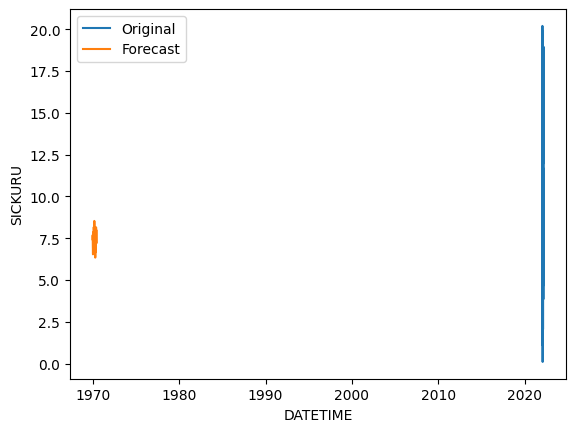

In [ ]:
# original ve df_forecast DataFrame'lerinin indeksinde DATETIME, sütunlarda ise SICKURU bulunuyor.
sns.lineplot(x=original.index, y=original['SICKURU'], label='Original')
sns.lineplot(x=df_forecast.index, y=df_forecast['SICKURU'], label='Forecast')
